In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    return stemmed_tokens


[nltk_data] Downloading package punkt to /Users/fox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/fox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:


def perform_stemming(filtered_tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

def tokenize(text):
    tokens = word_tokenize(text.lower())
    return tokens

def stopword(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens=[]
    for token in tokens:
        if token.isalnum() and token not in stop_words:
            filtered_tokens.append(token)
    #return filtered_tokens


    #filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return filtered_tokens

def preprocessed_tokenss (text):
   
    return perform_stemming(stopword(tokenize(text)))
    


In [3]:
raw_text = """
I love machine learning. It is awesome!
Deep learning and natural language processing are very cool.
Artificial intelligence is the future.
"""

print(preprocessed_tokenss('Shri Nirhanjani Harish @Govardhan is a machine Learning engineer'))


['shri', 'nirhanjani', 'harish', 'govardhan', 'machin', 'learn', 'engin']


In [4]:
raw_text = """
I love machine learning. It is awesome!
Deep learning and natural language processing are very cool.
Artificial intelligence is the future.
"""

preprocessed_tokens = preprocess_text(raw_text)
print(preprocessed_tokens)


['love', 'machin', 'learn', 'awesom', 'deep', 'learn', 'natur', 'languag', 'process', 'cool', 'artifici', 'intellig', 'futur']


In [5]:
glove_embeddings = {}
with open("./glove.6B/glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector



In [6]:
model = Word2Vec([preprocessed_tokens], min_count=1, vector_size=50, workers=4)

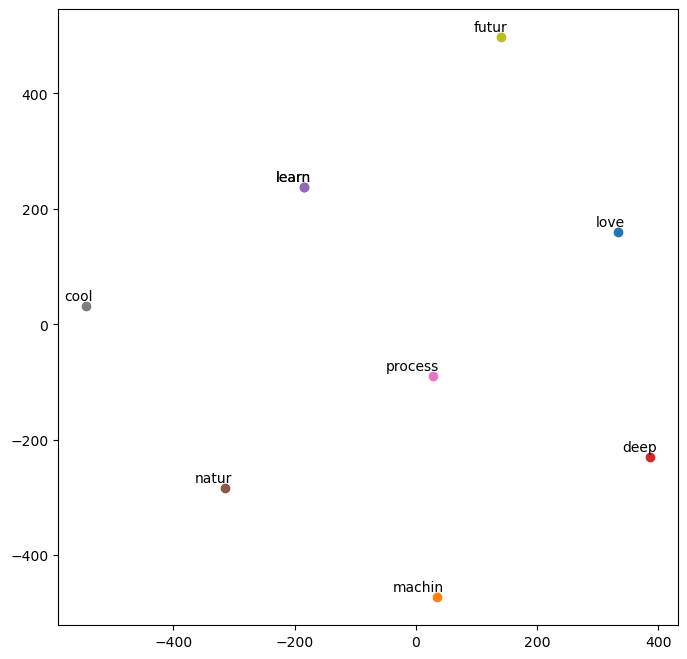

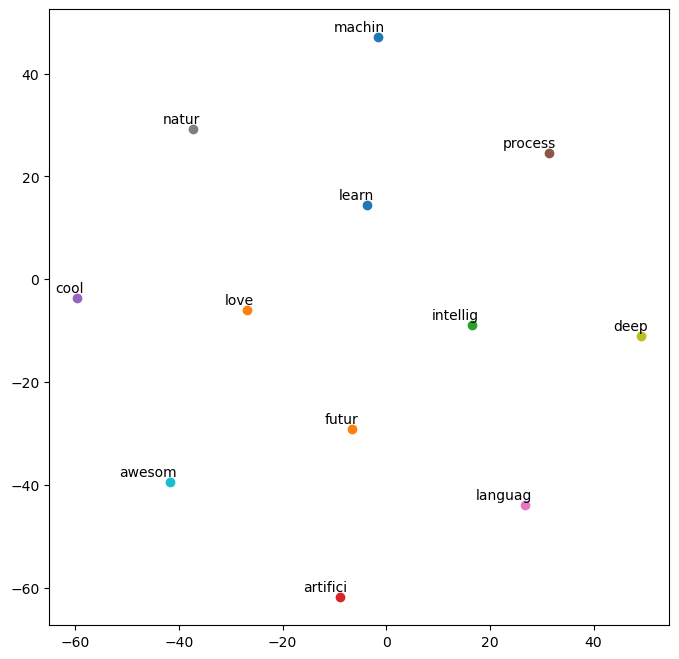

In [7]:
def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For GloVe
glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

# For Word2Vec
word2vec_words = model.wv.index_to_key
visualize_embeddings(model.wv, word2vec_words)
